In [ ]:
#@title Installing the Dependencies
!pip install neurokit2
import numpy
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import numpy as np
import neurokit2 as nk


from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive


In [ ]:
#@title Data Segment
file = "drive//MyDrive//RAW//ppg//0000.csv"
data = pd.read_csv(file)

#data = np.array(data)
data

,1649438306,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,98,74722.0,252665.0,264880.0
1,98,74761.0,252726.0,264924.0
2,98,74801.0,252745.0,264944.0
3,98,74787.0,252654.0,264851.0
4,98,74706.0,252366.0,264568.0
...,...,...,...,...
25771,104,72081.0,249685.0,265260.0
25772,104,72114.0,249708.0,265263.0
25773,104,72124.0,249667.0,265198.0
25774,104,72100.0,249576.0,265097.0


**Loading the data**

In [ ]:
file = "drive//MyDrive//RAW//ppg//0000.csv"
data = pd.read_csv(file)

#data = np.array(data)
data

,1649438306,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,98,74722.0,252665.0,264880.0
1,98,74761.0,252726.0,264924.0
2,98,74801.0,252745.0,264944.0
3,98,74787.0,252654.0,264851.0
4,98,74706.0,252366.0,264568.0
...,...,...,...,...
25771,104,72081.0,249685.0,265260.0
25772,104,72114.0,249708.0,265263.0
25773,104,72124.0,249667.0,265198.0
25774,104,72100.0,249576.0,265097.0


In [ ]:
print(data.corr())

            1649438306  Unnamed: 1  Unnamed: 2  Unnamed: 3
1649438306    1.000000    0.014812    0.023690    0.016137
Unnamed: 1    0.014812    1.000000    0.918067    0.842142
Unnamed: 2    0.023690    0.918067    1.000000    0.972452
Unnamed: 3    0.016137    0.842142    0.972452    1.000000


In [ ]:
#@title Channel wise cleaning
channel_1 = data.iloc[:,1]
PPG_Clean_1 =  nk.ppg_clean(channel_1, 25, method='elgendi')

channel_2 = data.iloc[:,2]
PPG_Clean_2 =  nk.ppg_clean(channel_2, 25, method='elgendi')

channel_3= data.iloc[:,3]
PPG_Clean_3 = nk.ppg_clean(channel_3, 25, method='elgendi')

/usr/local/lib/python3.9/dist-packages/neurokit2/ppg/ppg_clean.py:73: NeuroKitWarning: There are 1 missing data points in your signal. Filling missing values by using the forward filling method.
  warn(


In [ ]:
#@title Manual Filtering
# using a butterworth filter
from scipy.signal import butter, lfilter, lfilter_zi

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter_zi(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    zi = lfilter_zi(b, a)
    y,zo = lfilter(b, a, data, zi=zi*data[0])
    return y
lowcut = 0.5
highcut = 12
orders = 2

In [ ]:
Butterworth_data_1 = butter_bandpass_filter_zi(channel_1[0:1000], lowcut, highcut, 25, order=orders)
Butterworth_data_2 = butter_bandpass_filter_zi(channel_2[0:1000], lowcut, highcut, 25, order=orders)
Butterworth_data_3 = butter_bandpass_filter_zi(channel_3[0:1000], lowcut, highcut, 25, order=orders)

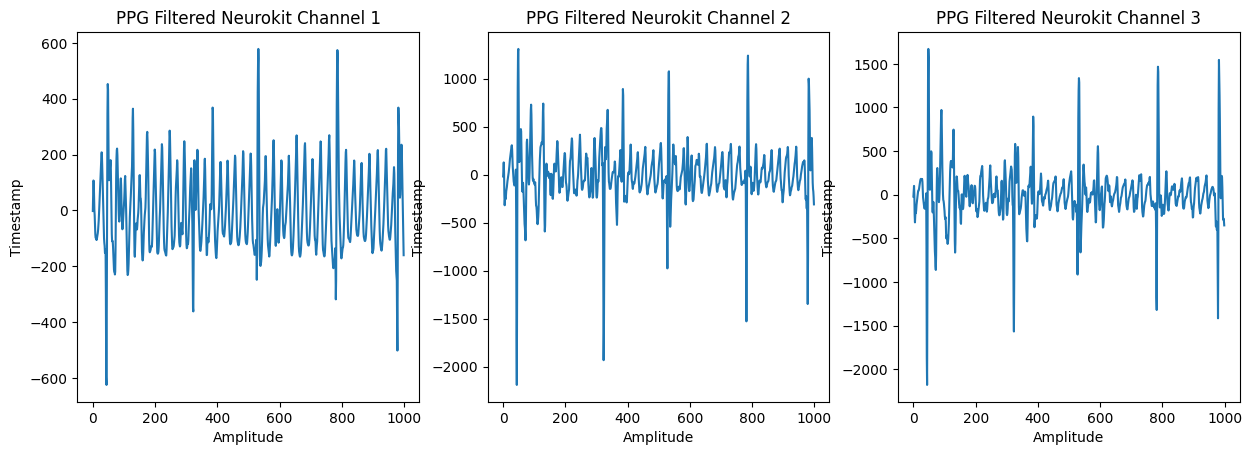

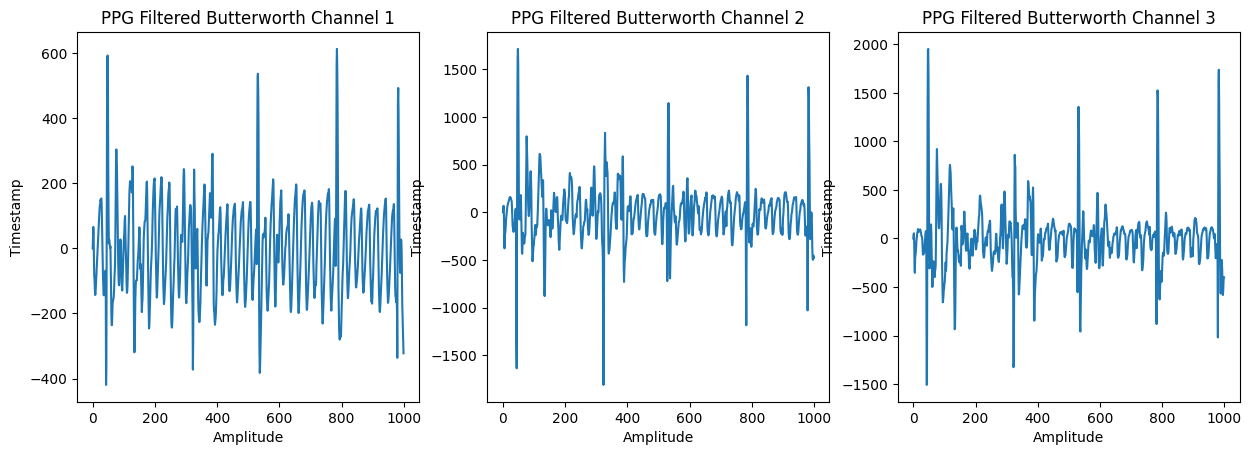

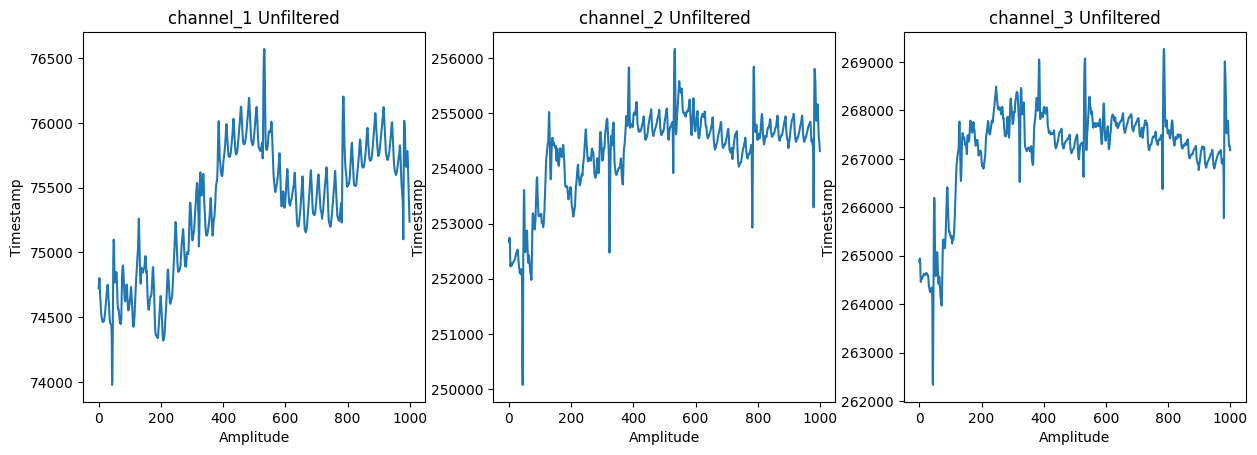

In [ ]:
#@title Plotting
plt.figure().set_figwidth(15)

plt.subplot(1, 3, 1)
plt.plot(PPG_Clean_1[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("PPG Filtered Neurokit Channel 1")


plt.subplot(1, 3, 2)
plt.plot(PPG_Clean_2[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("PPG Filtered Neurokit Channel 2")

plt.subplot(1, 3, 3)
plt.plot(PPG_Clean_3[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("PPG Filtered Neurokit Channel 3")


plt.figure().set_figwidth(15)

plt.subplot(1, 3, 1)
plt.plot(Butterworth_data_1[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("PPG Filtered Butterworth Channel 1")


plt.subplot(1, 3, 2)
plt.plot(Butterworth_data_2[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("PPG Filtered Butterworth Channel 2")

plt.subplot(1, 3, 3)
plt.plot(Butterworth_data_3[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("PPG Filtered Butterworth Channel 3")

plt.show()

plt.figure().set_figwidth(15)
plt.subplot(1, 3, 1)
plt.plot(channel_1[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("channel_1 Unfiltered")

plt.subplot(1, 3, 2)
plt.plot(channel_2[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("channel_2 Unfiltered")

plt.subplot(1, 3, 3)
plt.plot(channel_3[0:1000])
plt.xlabel("Amplitude")
plt.ylabel('Timestamp')
plt.title("channel_3 Unfiltered")
plt.show()

# Compression

In [ ]:
import math
def Golomb_Rice_compression(channels,b):
  x  = np.array(channels) #this line takes the column 3 data and transform it to a numpy array

  N= 1000    # 1000;
  golomb_parameter=b
  M=math.pow(2,golomb_parameter)         # Golomb parameter
  codeStream=""
  codeStream_debug=""
  #Step 1: calculate the differential
  y=x[0:N-1]-x[1:N]
  z=[0]*N
  r=[0]*N
  q=[0]*N

  for k in range (N-1):
      if y[k]>=0 :
          z[k]=2*y[k]
      else :
          z[k]=-2*y[k]-1
      # Step 3: Golomb code

      #def golomb(codeword,m):
      c = int(math.ceil(math.log(M,2)))  # for the formulas refer wikipedia page link in the readme file
      #calculate quotient, remainder
      r[k] = int(z[k]%M)
      q[k] = int(math.floor(z[k]/M))

      div = int(math.pow(2,c)-M)

      #Step 4.1: quotient is put in unary code
      quotientBit = ""
      remainderBit=""
      a=""
      for i in range(q[k]):
          quotientBit = quotientBit + "1"
      quotientBit = quotientBit + "0"
      #     print("First:",first)
      #Step 4.2: remainder is in binary mode
      if r[k] < div:
          b = c-1
          a = "{0:0" + str(b) + "b}"
          #print("1",a.format(r[k]))
          remainderBit = a.format(r[k])
      else:
          b = c
          a = "{0:0" + str(b) + "b}"
          #print("2",a.format(r[k] + div))
          remainderBit = a.format(r[k] + div)

      codeStream_debug = codeStream_debug + quotientBit + "."+ remainderBit +"|"
      codeStream = codeStream + quotientBit + remainderBit


  return codeStream_debug, codeStream, z

# # print("Golomb code parameter:",M)
# # print("Number of samples:",N, " and number of bits:", N*24);
# # print("Length of compressed data", len(codeStream)+24)
# # print("Code rate:",(len(codeStream)+24)/(N*24))
# # print(f"the time consumption {end-start}")

# # if ((len(codeStream)+24)/(N*24) > 1):
# #   print("compression ratio is not good")
# # else:
# #   print("compression ratio is ok")

# print(codeStream_debug)
# print(codeStream)


In [ ]:
channels = PPG_Clean_3
b = 5
codeStream_debug, codeStream, z = Golomb_Rice_compression(channels, b)
print(len(channels))

25776


In [ ]:
#@title Decompression
Q_read = 1
R_read = 0

q_part = ""
r_part = ""

q_val = []
r_val = []


counter = b #this is the golomb remainder parametere which is the lenght of the remainder

for i in codeStream:
  if (Q_read == 1 and i == '1'):
    q_part = q_part + '1'
  if (Q_read == 1 and i == '0'):
    q_val.append(q_part)
    q_part = ""
    # q_part = q_part + '0'
    # q_val.append(q_part)
    R_read = 1
    Q_read = 0
    continue
  if (R_read and counter >0):
    r_part = r_part + i
    counter = counter -1
    if (counter ==0):
      r_val.append(r_part)
      r_part = ""
      R_read = 0
      Q_read = 1
      counter = 10 ## again ssetting it to the proper value (remainder this values setting must be done properly otherwise results would be fatal)

In [ ]:
print(codeStream_debug)
print(q_val)
print(r_val)

11110.00000|1110.10010|1111110.01100|111111111111110.00111|111110.01111|11110.11101|110.10010|0.11001|110.00011|1110.10000|110.00010|10.10111|110.00000|110.00000|10.11000|0.10001|0.11111|10.00001|10.10011|10.01000|10.01111|10.10010|0.11011|0.01000|0.00001|0.10000|0.11111|0.01110|110.00011|111110.11000|111110.01000|110.00101|10.10110|10.11111|10.00011|10.00101|10.00101|110.11101|10.11111|110.11010|111110.11100|111111111111111111111111111111111111110.01101|1111111111111111111111111111111111111111111111111111111111111111111111111111110.11001|111111111111111111110.00000|1111111111111111111111111111111111111111111111111111111111111111111111111110.11111|11111111111111111111111111111111111111111111111111111111111111111111111111111111111111111110.00110|111111111111111111111111111111111111111111111111110.11110|11111111111111111111110.01111|1111110.00001|111111111111111111111111111111111111110.11000|11111111111111111111111111111111111111110.00110|1111111111111110.01101|0.10000|0.10110|11110.1011

**Recognising NULL values as 0s**

In [ ]:
for i in range(len(q_val)):
  if (q_val[i] == ''):
    q_val[i] = '0'

print(q_val)

['1111', '111', '1', '111111111', '0', '111', '11', '111', '0', '1', '0', '1', '0', '111', '111', '1', '1', '1', '0', '0', '0', '1', '111', '0', '0', '1111', '0', '111111111111111111111111111111111', '1111111111111111111111111111111111111111111111111111111111111111111111111', '111111111111111', '1111111111111111111111111111111111111111111111111111111111111111111111', '11111111111111111111111111111111111111111111111111111111111111111111111111111111111111', '111111111111111111111111111111111111111111111', '11111111111111111', '1', '111111111111111111111111111111111', '11111111111111111111111111111111111', '1111111111', '0', '0', '111111', '11111', '1', '11', '1111111111', '111111', '0', '0', '1111', '111', '1111', '111', '0', '0', '0', '1', '1', '111111111111111111', '1111111111111111111', '11111111', '0', '1111', '0', '1', '1', '1111', '11', '111111', '111111111', '1111111', '1111', '0', '1', '111111111111', '1111111111', '11111', '111', '0', '1', '1', '11', '0', '1', '111', '0', '1', '

In [ ]:
from re import template
Q_vals_Decimals = []
for i in q_val:
  if (i == '0'):
    Q_vals_Decimals.append(0)
  else:
    Q_vals_Decimals.append(len(i))

print(Q_vals_Decimals)

[4, 3, 1, 9, 0, 3, 2, 3, 0, 1, 0, 1, 0, 3, 3, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 4, 0, 33, 73, 15, 70, 86, 45, 17, 1, 33, 35, 10, 0, 0, 6, 5, 1, 2, 10, 6, 0, 0, 4, 3, 4, 3, 0, 0, 0, 1, 1, 18, 19, 8, 0, 4, 0, 1, 1, 4, 2, 6, 9, 7, 4, 0, 1, 12, 10, 5, 3, 0, 1, 1, 2, 0, 1, 3, 0, 1, 0, 1, 0, 0, 11, 5, 5, 2, 1, 0, 0, 1, 0, 2, 9, 2, 6, 19, 18, 13, 3, 1, 12, 12, 4, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 4, 0, 4, 0, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 4, 0, 0, 1, 0, 0, 0, 1, 6, 0, 1, 0, 0, 1, 1, 9, 0, 2, 3, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 4, 2, 0, 5, 0, 0, 2, 0, 3, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 5, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 5, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 7, 2, 2, 1, 10, 7, 5, 2, 1, 5, 0, 2, 4, 0, 0, 1, 0, 4, 0, 1, 0, 0, 0, 1, 0, 3, 7, 1, 24, 42, 14, 31, 51, 28, 3, 0, 4, 7, 9, 0, 7, 0, 0, 13, 11, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 10, 5, 1, 0, 0, 9, 11, 5, 3, 2, 1, 0, 1, 1, 1, 4, 0, 0, 14, 18, 8, 1, 22, 25, 9, 2, 0, 1, 0, 2, 6, 1, 0, 0, 0, 0, 2, 3, 2, 4, 2, 0, 3, 0, 0, 1, 5, 1, 0, 1, 1, 

**Conversion of r[k] from bits to decimals**

In [ ]:
r_val_Decimal = []
for i in r_val:
  r_val_Decimal.append(int(i,2))

print(r_val_Decimal)

[0, 607, 415, 255, 510, 932, 451, 536, 687, 24, 176, 191, 52, 275, 589, 256, 527, 472, 1019, 249, 197, 727, 113, 791, 951, 863, 927, 447, 831, 31, 1023, 223, 991, 511, 63, 799, 223, 424, 367, 767, 767, 241, 1023, 95, 511, 924, 633, 737, 767, 95, 159, 703, 830, 703, 346, 1023, 639, 383, 735, 648, 979, 639, 703, 316, 165, 31, 639, 511, 255, 511, 286, 319, 863, 767, 767, 735, 446, 87, 922, 425, 854, 807, 287, 605, 224, 861, 846, 123, 757, 504, 447, 799, 255, 254, 744, 178, 80, 427, 927, 511, 734, 1023, 223, 159, 127, 159, 511, 415, 447, 95, 925, 571, 478, 475, 90, 751, 899, 362, 510, 575, 139, 1023, 95, 708, 971, 184, 595, 159, 31, 63, 706, 863, 862, 125, 185, 799, 94, 754, 771, 886, 409, 607, 213, 335, 317, 112, 923, 23, 995, 138, 915, 426, 775, 848, 92, 507, 732, 566, 219, 9, 783, 474, 379, 351, 319, 859, 764, 480, 244, 295, 31, 511, 733, 241, 332, 661, 696, 89, 495, 819, 978, 934, 221, 759, 417, 927, 88, 997, 1017, 240, 286, 629, 17, 246, 227, 225, 168, 669, 319, 1023, 304, 960, 81, 25

In [ ]:
print(len(r_val_Decimal))

699


In [ ]:
decompressed_data = []
M=math.pow(2,b)
for i in range(len(r_val_Decimal)):
  decompressed_data.append(M * Q_vals_Decimals[i] + r_val_Decimal[i])

##print(z)
print(decompressed_data)

[128.0, 703.0, 447.0, 543.0, 510.0, 1028.0, 515.0, 632.0, 687.0, 56.0, 176.0, 223.0, 52.0, 371.0, 685.0, 288.0, 559.0, 504.0, 1019.0, 249.0, 197.0, 759.0, 209.0, 791.0, 951.0, 991.0, 927.0, 1503.0, 3167.0, 511.0, 3263.0, 2975.0, 2431.0, 1055.0, 95.0, 1855.0, 1343.0, 744.0, 367.0, 767.0, 959.0, 401.0, 1055.0, 159.0, 831.0, 1116.0, 633.0, 737.0, 895.0, 191.0, 287.0, 799.0, 830.0, 703.0, 346.0, 1055.0, 671.0, 959.0, 1343.0, 904.0, 979.0, 767.0, 703.0, 348.0, 197.0, 159.0, 703.0, 703.0, 543.0, 735.0, 414.0, 319.0, 895.0, 1151.0, 1087.0, 895.0, 542.0, 87.0, 954.0, 457.0, 918.0, 807.0, 319.0, 701.0, 224.0, 893.0, 846.0, 155.0, 757.0, 504.0, 799.0, 959.0, 415.0, 318.0, 776.0, 178.0, 80.0, 459.0, 927.0, 575.0, 1022.0, 1087.0, 415.0, 767.0, 703.0, 575.0, 607.0, 447.0, 831.0, 479.0, 1053.0, 571.0, 574.0, 475.0, 90.0, 751.0, 899.0, 394.0, 510.0, 575.0, 203.0, 1023.0, 127.0, 836.0, 971.0, 312.0, 595.0, 191.0, 63.0, 159.0, 706.0, 863.0, 862.0, 125.0, 185.0, 863.0, 94.0, 754.0, 803.0, 918.0, 409.0, 

# Ideal Parameter Selection


Given µ, the optimum GPO2 code parameter must be in the range [k∗
min(µ), k∗
max(µ)], where

$k_{min}\left ( \mu  \right ) = max\left\{ 0,\left \lfloor log_2\left ( \frac{2}{3} \left ( \mu +1 \right )\right )\right \rfloor\right\}$

and

$k_{max}\left ( \mu  \right ) = max\left\{ 0,\left \lceil log_2\mu \right \rceil\right\}$

above is the paper one's ideal approximation of the golomb parameter k
where mu is the arthmetic average of the data
we will take 2 time stamps to calculate the above function and compress it using the above function and compare

\\\\\
\\
\\
\\

Below shown is the calculation of the K_min and the K_max data

In [ ]:
mean = np.mean(z)
K_min_log_val = math.log2((2/3)*(mean + 1))
K_min = math.floor(K_min_log_val)

K_max_log_val = math.log2(mean)
K_max = math.ceil(mean)

print(f"K_min - {K_min}")
print(f"K_max - {K_max}")

K_min - 6
K_max - 156


**Compressing through K_min to K_max data**

In [ ]:
r = [0]*len(z)
q = [0]*len(z)
N = 1000
code_rates = []
for x in range(K_max):
  b=x
  M=math.pow(2,b)         # Golomb parameter
  codeStream=""
  codeStream_debug=""
  for k in range (N-1):
    # Step 3: Golomb code

    #def golomb(codeword,m):
    c = int(math.ceil(math.log(M,2)))  # for the formulas refer wikipedia page link in the readme file
    #calculate quotient, remainder
    r[k] = int(z[k]%M)
    q[k] = int(math.floor(z[k]/M))

    div = int(math.pow(2,c)-M)

    #Step 4.1: quotient is put in unary code
    quotientBit = ""
    remainderBit=""
    a=""
    for i in range(q[k]):
        quotientBit = quotientBit + "1"
    quotientBit = quotientBit + "0"
    #     print("First:",first)
    #Step 4.2: remainder is in binary mode
    if r[k] < div:
        b = c-1
        a = "{0:0" + str(b) + "b}"
        #print("1",a.format(r[k]))
        remainderBit = a.format(r[k])
    else:
        b = c
        a = "{0:0" + str(b) + "b}"
        #print("2",a.format(r[k] + div))
        remainderBit = a.format(r[k] + div)

    codeStream_debug = codeStream_debug + quotientBit + "."+ remainderBit +"|"
    codeStream = codeStream + quotientBit + remainderBit
  code_rates.append((len(codeStream)+24)/(N*24))

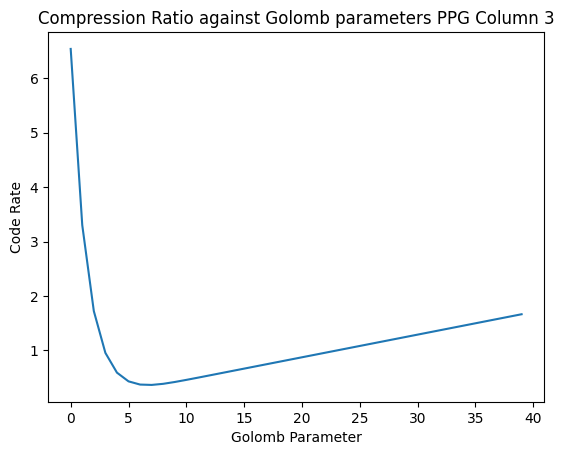

In [ ]:
#@title Plotting
code_rate = code_rates[:40]
parameters = []
for x in range(40):
  parameters.append(x)

f, ax = plt.subplots()
ax.plot(parameters, code_rate)
ax.set_title('Compression Ratio against Golomb parameters PPG Column 3')
ax.set_ylabel("Code Rate")
ax.set_xlabel("Golomb Parameter")
plt.show()

In [ ]:
#@title Interactive Plot
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x= parameters, y=code_rate) )
fig.update_layout(
    title="Compression Ratio against Golomb Parameter PPG",
    xaxis_title="Golomb Parameter",
    yaxis_title="Compression ratio",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()